# Dataset

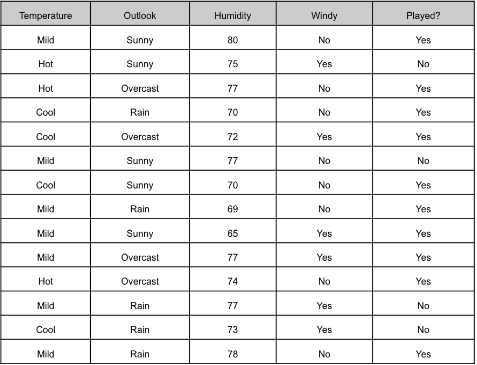

# Root Node

* First task is to determine the root node. What attribute, w.r.t. the attribute we wish to make a decision about (`Played?`), maximizes the information gain, and minimizes it's entropy? General entropy is as follows

$$
S_X=-\Sigma^c_{i=1}~p_i\log_2(p_i); s.t. c \in X
$$

So this is the Entropy for a given random variable, X, where i is the given value in this random variable (in our demonstration, these random variables are the attributes, and values are the features!). There exist `c` values in the given random variable. So $p_i$ is the probability of a value occuring in the set of X. Now, getting our root node. 

1) Calculate Entropy of `Played?` Attribute. Recall that Entropy is a measurement of uncertainty. The more uncertainty we have (Entropy), the worse our attribute is at making a decision.

$$
S_\text{Played?} = -\frac{10}{14}\log_2(\frac{10}{14})-\frac{4}{14}\log_2(\frac{4}{14}) = 0.863~\text{bits}
$$

2) Entropy of `Temperature`, w.r.t. `Played?` 

* Three values in the random variable. `Mild`, `Hot`, and `Cool`. Each is w.r.t. `Played?`, for their given subset of `Temperature`

$$
S_\text{Mild, Played?} = -\frac{5}{7}\log_2(\frac{5}{7})-\frac{2}{7}\log_2(\frac{2}{7}) = 0.863~\text{bits}
$$

$$
S_\text{Hot, Played?} = -\frac{2}{3}\log_2(\frac{2}{3})-\frac{1}{3}\log_2(\frac{1}{3}) = 0.918~\text{bits}
$$

$$
S_\text{Cool, Played?} = -\frac{3}{4}\log_2(\frac{3}{4})-\frac{1}{4}\log_2(\frac{1}{4}) = 0.811~\text{bits}
$$

* Now, the Entropy of `Temperature` w.r.t. `Played?` is the sum of these entropies! Since `Temperature` can be `Mild` OR `Hot` OR `Cool`. But, we need to weight them by their membership in the `Temperature` set. Some Entropy is more important than others. Namely `Mild`. So, our equation ends up looking like... 

$$
S_\text{Temperature, Played?} = \frac{7}{14}S_\text{Mild, Played?} + \frac{3}{14}S_\text{Hot, Played?} + \frac{4}{14}S_\text{Cool, Played?} = 0.860~\text{bits}
$$

3) Entropy of `Outlook` w.r.t. `Played?`

* Using `Sunny`, `Rain`, and `Overcast` random variables.

$$
S_\text{Sunny, Played?} = -\frac{2}{5}\log_2(\frac{2}{5})-\frac{3}{5}\log_2(\frac{3}{5}) = 0.971~\text{bits}
$$

$$
S_\text{Rain, Played?} = -\frac{3}{5}\log_2(\frac{3}{5})-\frac{2}{5}\log_2(\frac{2}{5}) = 0.971~\text{bits}
$$

* 0 bits! All `Overcast` measurements result in Yes. There is no uncertainty here.
$$
S_\text{Overcast, Played?} = -\frac{4}{4}\log_2(\frac{4}{4})-\frac{0}{4}\log_2(\frac{0}{4}) = 0.000~\text{bits}
$$

$$
S_\text{Outlook, Played?} = \frac{5}{14}S_\text{Sunny, Played?} + \frac{5}{14}S_\text{Rain, Played?} + \frac{4}{14}S_\text{Overcast, Played?} = 0.693~\text{bits}
$$

4) Entropy of `Humidity` w.r.t. `Played?`

* This is a numerical attribute, so we need a slightly different approach. If we choose a threshold, we can then represent this random variable as being of 2 potential values! Above or below the threshold (or equal, if applicable). Either way, it allows our math to work similarily.
* From a Piazza post: "<= 75 for low humidity and 75 > for high humidity"
* And just like that, we have 2 values to choose from. Entropies of each below.

$$
S_\text{Low, Played?} = -\frac{6}{7}\log_2(\frac{6}{7})-\frac{1}{7}\log_2(\frac{1}{7}) = 0.592~\text{bits}
$$

$$
S_\text{High, Played?} = -\frac{4}{7}\log_2(\frac{4}{7})-\frac{3}{7}\log_2(\frac{3}{7}) = 0.985~\text{bits}
$$

$$
S_\text{Humidity, Played?} = \frac{7}{14}S_\text{Low, Played?} + \frac{7}{14}S_\text{High, Played?} = 0.788~\text{bits}
$$

5) Entropy of `Windy` w.r.t. `Played?`

$$
S_\text{No, Played?} = -\frac{7}{8}\log_2(\frac{7}{8})-\frac{1}{8}\log_2(\frac{1}{8}) = 0.544~\text{bits}
$$

$$
S_\text{Yes, Played?} = -\frac{3}{6}\log_2(\frac{3}{6})-\frac{3}{6}\log_2(\frac{3}{6}) = 1.000~\text{bits}
$$

$$
S_\text{Windy, Played?} = \frac{8}{14}S_\text{No, Played?} + \frac{6}{14}S_\text{Yes, Played?} = 0.739~\text{bits}
$$


5) Comparing Information Gains 

* We can now compute the Information Gain. It is the difference of the Entropy we are looking to decide, and the Entropy of the attributes we are selecting from to construct the current node. Whichever difference is greatest has the Maximum Gain, and should be used for the node.

$$
IG_\text{Played?, Temperature} = S_\text{Played?} - S_\text{Temperature, Played?} = 0.003~\text{bits}
$$

$$
IG_\text{Played?, Outlook} = S_\text{Played?} - S_\text{Outlook, Played?} = 0.170~\text{bits}
$$

$$
IG_\text{Played?, Humidity} = S_\text{Played?} - S_\text{Humidity, Played?} = 0.075~\text{bits}
$$

$$
IG_\text{Played?, Windy} = S_\text{Played?} - S_\text{Windy, Played?} = 0.124~\text{bits}
$$

6) Outlook is first node. Decision Tree so far is below. Represented as a rudimentary FSM. 


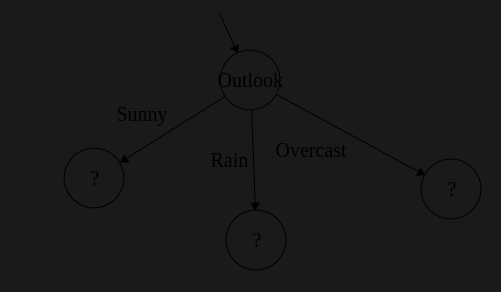

## Sunny Edge

1) Now that Outlook is our root node, we must now determine the children nodes. Once an attribute is used, it cannot be re-used, so we must determine where to place `Temperature`, `Humidity`, and `Windy`. These will be evaluated for a subset of `Played?`, eahc of which corresponds to `Sunny`, `Rain`, or `Overcast` since they are all separated (hence the three edges above, one for each of them). We start with the `Sunny` Node

2) Calculate Entropy of Temperature, as it exists in `Sunny`

$$
S_\text{Mild, Sunny} = -\frac{2}{3}\log_2(\frac{2}{3})-\frac{1}{3}\log_2(\frac{1}{3}) = 0.918~\text{bits}
$$

$$
S_\text{Hot, Sunny} = -\frac{1}{1}\log_2(\frac{1}{1})-\frac{0}{1}\log_2(\frac{0}{1}) = 0.000~\text{bits}
$$


$$
S_\text{Cool, Sunny} = -\frac{0}{1}\log_2(\frac{0}{1})-\frac{1}{1}\log_2(\frac{1}{1}) = 0.000~\text{bits}
$$


$$
S_\text{Temperature, Sunny} = \frac{3}{5}S_\text{Mild, Sunny} + \frac{1}{5}S_\text{Hot, Sunny} + \frac{1}{5}S_\text{Cool, Sunny} = 0.551~\text{bits}
$$

3) Calculate Entropy of Humidity, as it exists in `Sunny`

$$
S_\text{Low, Sunny} = -\frac{2}{2}\log_2(\frac{2}{2})-\frac{0}{0}\log_2(\frac{0}{0}) = 0.000~\text{bits}
$$

$$
S_\text{High, Sunny} = -\frac{2}{3}\log_2(\frac{2}{3})-\frac{1}{3}\log_2(\frac{1}{3}) = 0.918~\text{bits}
$$

$$
S_\text{Humidity, Sunny} = \frac{2}{5}S_\text{Low, Sunny} + \frac{3}{5}S_\text{High, Sunny} = 0.551~\text{bits}
$$

4) Calculate Entropy of Windy, as it exists in `Sunny`

$$
S_\text{No, Sunny} = -\frac{2}{3}\log_2(\frac{2}{3})-\frac{1}{3}\log_2(\frac{1}{3}) = 0.918~\text{bits}
$$

$$
S_\text{Yes, Sunny} = -\frac{1}{2}\log_2(\frac{1}{2})-\frac{1}{2}\log_2(\frac{1}{2}) = 1.000~\text{bits}
$$

$$
S_\text{Windy, Sunny} = \frac{3}{5}S_\text{No, Sunny} + \frac{2}{5}S_\text{Yes, Sunny} = 0.951~\text{bits}
$$

5) Compare Information Gains 

$$
IG_\text{Sunny, Temperature} = S_\text{Sunny} - S_\text{Temperature, Sunny} = 0.420~\text{bits}
$$

$$
IG_\text{Sunny, Humidity} = S_\text{Sunny} - S_\text{Humidity, Sunny} = 0.420~\text{bits}
$$

$$
IG_\text{Sunny, Windy} = S_\text{Sunny} - S_\text{Windy, Sunny} = 0.020~\text{bits}
$$

6) Temperature and Humidity are tied for Gain! Let's go ahead and choose Humidity, somewhat arbitrarily 


## Rain Edge

1) Repeat the same procedure to determine the node at inbound `Rain` edge.

2) Calculate Entropy of Temperature, as it exists in `Rain`

$$
S_\text{Mild, Rain} = -\frac{2}{3}\log_2(\frac{2}{3})-\frac{1}{3}\log_2(\frac{1}{3}) = 0.918~\text{bits}
$$

* Hot does not exist. No entropy to consider.

$$
S_\text{Cool, Rain} = -\frac{1}{2}\log_2(\frac{1}{2})-\frac{1}{2}\log_2(\frac{1}{2}) = 1.000~\text{bits}
$$


$$
S_\text{Temperature, Rain} = \frac{3}{5}S_\text{Mild, Rain} + \frac{2}{5}S_\text{Cool, Rain} = 0.951~\text{bits}
$$

3) Calculate Entropy of Humidity, as it exists in `Rain`

$$
S_\text{Low, Rain} = -\frac{2}{3}\log_2(\frac{2}{3})-\frac{1}{3}\log_2(\frac{1}{3}) = 0.918~\text{bits}
$$

$$
S_\text{High, Rain} = -\frac{1}{2}\log_2(\frac{1}{2})-\frac{1}{2}\log_2(\frac{1}{2}) = 1.000~\text{bits}
$$

$$
S_\text{Humidity, Rain} = \frac{3}{5}S_\text{Low, Sunny} + \frac{2}{5}S_\text{High, Sunny} = 0.951~\text{bits}
$$

4) Calculate Entropy of Windy, as it exists in `Rain`

$$
S_\text{No, Rain} = -\frac{2}{3}\log_2(\frac{2}{3})-\frac{1}{3}\log_2(\frac{1}{3}) = 0.918~\text{bits}
$$

$$
S_\text{Yes, Rain} = -\frac{2}{2}\log_2(\frac{2}{2})-\frac{0}{2}\log_2(\frac{0}{2}) = 0.000~\text{bits}
$$

$$
S_\text{Windy, Rain} = \frac{3}{5}S_\text{No, Rain} + \frac{2}{5}S_\text{Yes, Rain} = 0.551~\text{bits}
$$

5) Compare Information Gains 

$$
IG_\text{Rain, Temperature} = S_\text{Rain} - S_\text{Temperature, Rain} = 0.020~\text{bits}
$$

$$
IG_\text{Rain, Humidity} = S_\text{Rain} - S_\text{Humidity, Rain} = 0.020~\text{bits}
$$

$$
IG_\text{Rain, Windy} = S_\text{Rain} - S_\text{Windy, Rain} = 0.420~\text{bits}
$$

6) Node for Rain decision will be Windy!

## Overcast Edge

* Because no matter what we choose in terms of attributes, an Overcast condition will always result in `Yes` for `Played?`, there is NO uncertainty. There is no decision to make here. Selecting Overcast from root node results in an immediate Yes!

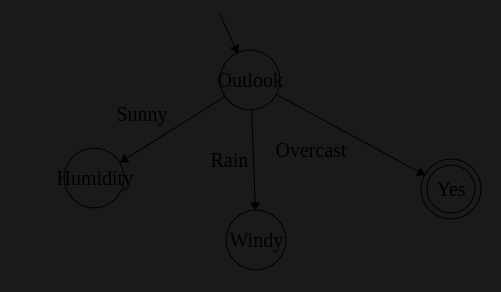

# Windy Node

## No Edge

* If we choose Rain Outlook, and No on Windy, always results in Yes` for `Played?`. No uncertainty, so it's just `Yes` here!

## Yes Edge

* If we choose `Rain` on `Outlook`, and `Yes` on Windy, always results in `No` for `Played?`. No uncertainty, so it's just `No` here!

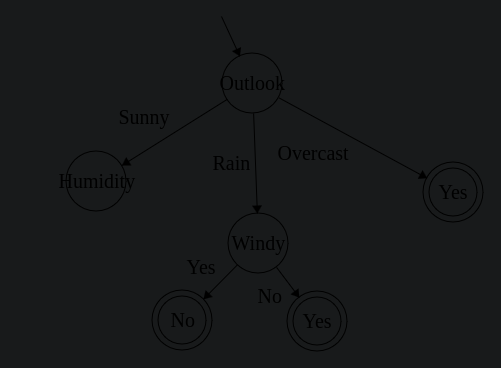

# Humidity Node

## Low Edge

If we have a `Sunny` Outlook, and a `Low` Humidity, there is no uncertainty. All results for `Played?` are `Yes`!

## High Edge

1) Repeat the same procedure to determine the node at inbound `High` edge.

2) Calculate Entropy of Temperature, as it exists with `High` humidity and `Sunny` outlook

$$
S_\text{Mild, Sunny, High} = -\frac{1}{2}\log_2(\frac{1}{2})-\frac{1}{2}\log_2(\frac{1}{2}) = 1.000~\text{bits}
$$


$$
S_\text{Hot, Sunny, High} = -\frac{0}{1}\log_2(\frac{0}{1})-\frac{1}{1}\log_2(\frac{1}{1}) = 0.000~\text{bits}
$$

* Cool does not exist. No entropy to consider.

$$
S_\text{Temperature, Sunny, High} = \frac{2}{3}S_\text{Mild, Sunny, High} + \frac{1}{3}S_\text{Hot, Sunny, High} = 0.667~\text{bits}
$$

4) Calculate Entropy of Windy, as it exists with `High` humidity and `Sunny` outlook

$$
S_\text{No, Sunny, High} = -\frac{1}{2}\log_2(\frac{1}{2})-\frac{1}{2}\log_2(\frac{1}{2}) = 1.000~\text{bits}
$$

$$
S_\text{Yes, Sunny, High} = -\frac{0}{1}\log_2(\frac{0}{1})-\frac{1}{1}\log_2(\frac{1}{1}) = 0.000~\text{bits}
$$

$$
S_\text{Windy, Sunny, High} = \frac{2}{3}S_\text{No, Sunny, High} + \frac{1}{3}S_\text{Yes, Sunny, High} = 0.667~\text{bits}
$$

5) Compare Information Gains 

$$
IG_\text{Sunny, High, Temperature} = S_\text{Sunny, High} - S_\text{Temperature, Sunny, High} = 0.251~\text{bits}
$$

$$
IG_\text{Sunny, High, Windy} = S_\text{Sunny, High} - S_\text{Windy, Sunny, High} = 0.251~\text{bits}
$$

6) Equivalency. Let's arbitrarily choose Temperature as the Node here. Update decision tree is now...

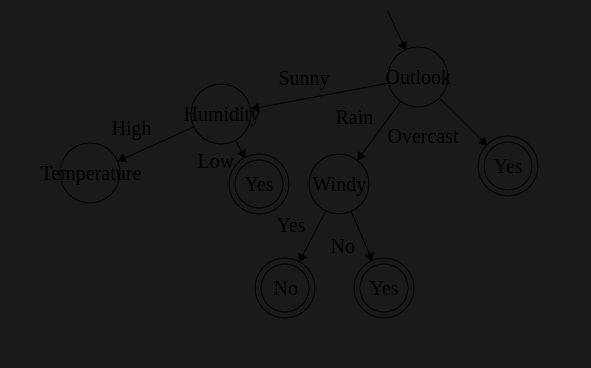

# Temperature Node

## Mild Edge

* We're at the end of our calculations, and there is seemingly nothing we can do to make this a pure leaf node. There are two outputs that are directly opposed to each other, with an identical set of attributes. See:

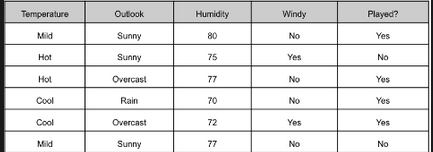

* In the first and last row. Identical `Temperature`, `Outlook`, and `Humidity`, but different `Played?` outcomes! Thus, we cannot say determine if we can or cannot play. It is a probabilistic measure of 0.5... which, in fact is maximum uncertainty. This is good to know for characterizing the dataset.

## Cool Edge 

* Not applicable to this problem. There is no Cool for High Humidity, Sunny Outlook instances.

## Hot Edge

* Only a single instance, and it is `No`. So this is a pure leaf node.

* At long last, our final graph is below...

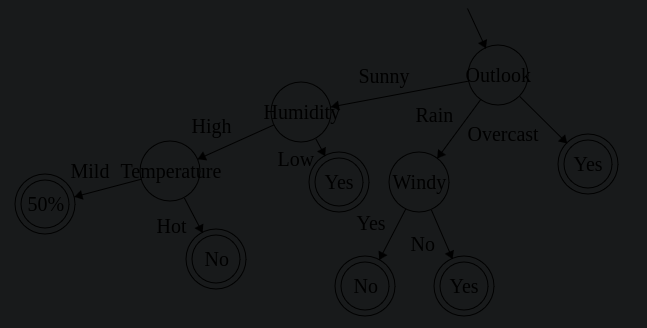

* Left with one impure node. 2 of the 14 instances are uncertain. The rest are bundled into the other leaf nodes, which are pure. The 50% leaf node indicates that whether or not it is Yes or No is the flip of a coin, which is highly entropic. 